# Ćwiczenie 1 - TIER protocol i tidy data

Celem ćwiczenia jest pobranie i uporządkowanie przydzielonego zbioru danych zgodnie z protokołem TIER i zasadami "tidy data".

W uporządkowanych danych:

Każda zmienna tworzy kolumnę.

Każda obserwacja tworzy rząd.

Każdy typ jednostki obserwacyjnej tworzy tabelę.

Użyj Pandas.

#### Numer swojego datasetu uzyskujemy ze wzoru (N mod 5) + 1, gdzie N to liczba liter w nazwisku -> u mnie jest to nr 4.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_import = "C:/Users/igach/Desktop/Studia 7 semestr/7 semestr/Bazy-danych/Lab2/Original Data/drinks.csv"

data = pd.read_csv(data_import)

### Sprawdzam poprawność zaimportowanego pliku:

In [ ]:
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
1,Albania,89,132,54,4.9
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
191,Zambia,32,19,4,2.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [ ]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

## Poprawa danych według TIER Protocol 

### Usuwam kraje, dla których wszystkie wartości wynoszą 0 (równoważność z brakiem danych)

In [ ]:
#data = data.loc[~(data == 0).all(axis = 1)] usuwa jeśli wszystkie wiersze to 0
# df = df[(df[['A','C']] != 0).all(axis=1)] usuwa wiersze, jeśli zarówno w kolumnach "A" i "C" jest 0.

data = data[(data[['beer_servings', 'spirit_servings', 'wine_servings']] != 0).all(axis=1)]

In [ ]:
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
1,Albania,89,132,54,4.9
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
191,Zambia,32,19,4,2.5


In [ ]:
path = "C:/Users/igach/Desktop/Studia 7 semestr/7 semestr/Bazy-danych/Lab2/Analysis Data" + "/drinks_reduced_empty_val.csv"
data.to_csv(path)

#### Było 193 wierszy, teraz jest 155

### Top 10 krajów, z największą całkowitą konsumpcją alkoholu:

In [ ]:
data2 = data.sort_values(by='total_litres_of_pure_alcohol', ascending=False)

data2.head(n = 10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
45,Czech Republic,361,170,134,11.8
61,France,127,151,370,11.8
141,Russian Federation,247,326,73,11.5
81,Ireland,313,118,165,11.4
155,Slovakia,196,293,116,11.4
99,Luxembourg,236,133,271,11.4


Text(0, 0.5, 'Servings')

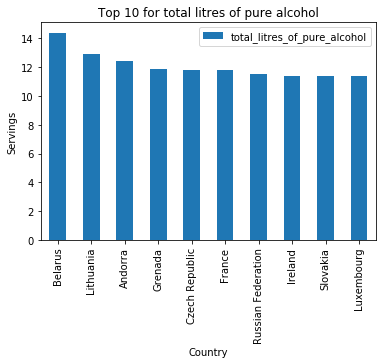

In [ ]:
data2 = data2[:10]

data2.plot.bar(x = 'country', y = 'total_litres_of_pure_alcohol')
plt.title("Top 10 for total litres of pure alcohol")
plt.xlabel("Country")
plt.ylabel("Servings")

Text(0, 0.5, 'Servings')

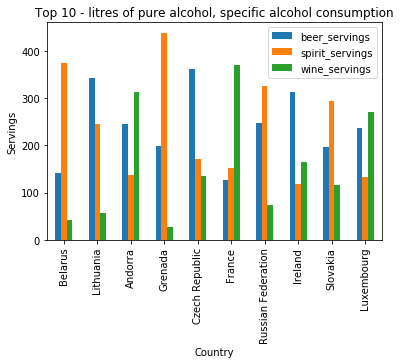

In [ ]:
data2.plot.bar(x = 'country', y = {'beer_servings', 'spirit_servings', 'wine_servings'})
plt.title("Top 10 - litres of pure alcohol, specific alcohol consumption")
plt.xlabel("Country")
plt.ylabel("Servings")

In [ ]:
path2 = "C:/Users/igach/Desktop/Studia 7 semestr/7 semestr/Bazy-danych/Lab2/Analysis Data" + "/Top_10_pure_alcohol.csv"
data2.to_csv(path2)

### Top 10 krajów, z największą konsumpcją piwa:

In [ ]:
data3 = data.sort_values(by='beer_servings', ascending=False)

data3.head(n = 10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


Text(0, 0.5, 'Servings')

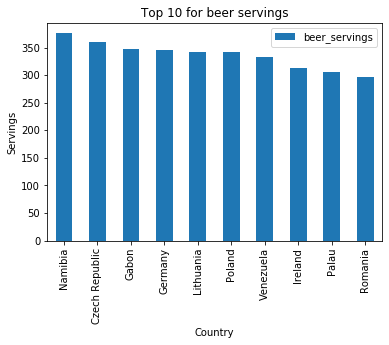

In [ ]:
data3 = data3[:10]

data3.plot.bar(x = 'country', y = 'beer_servings')
plt.title("Top 10 for beer servings")
plt.xlabel("Country")
plt.ylabel("Servings")

In [ ]:
path3 = "C:/Users/igach/Desktop/Studia 7 semestr/7 semestr/Bazy-danych/Lab2/Analysis Data" + "/Top_10_beer_servings.csv"
data3.to_csv(path3)

### Top 10 krajów, z największą konsumpcją spirytusu:

In [ ]:
data4 = data.sort_values(by='spirit_servings', ascending=False)

data4.head(n = 10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
68,Grenada,199,438,28,11.9
15,Belarus,142,373,42,14.4
141,Russian Federation,247,326,73,11.5
73,Haiti,1,326,1,5.9
144,St. Lucia,171,315,71,10.1
72,Guyana,93,302,1,7.1
155,Slovakia,196,293,116,11.4
50,Dominica,52,286,26,6.6
169,Thailand,99,258,1,6.4
25,Bulgaria,231,252,94,10.3


Text(0, 0.5, 'Servings')

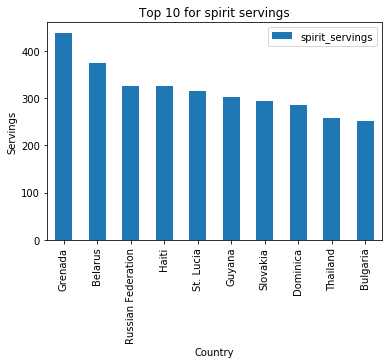

In [ ]:
data4 = data4[:10]

data4.plot.bar(x = 'country', y = 'spirit_servings')
plt.title("Top 10 for spirit servings")
plt.xlabel("Country")
plt.ylabel("Servings")

In [ ]:
path4 = "C:/Users/igach/Desktop/Studia 7 semestr/7 semestr/Bazy-danych/Lab2/Analysis Data" + "/Top_10_spirit_servings.csv"
data4.to_csv(path4)

### Top 10 krajów, z największą konsumpcją wina

In [ ]:
data5 = data.sort_values(by='wine_servings', ascending=False)

data5.head(n = 10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
6,Argentina,193,25,221,8.3


Text(0, 0.5, 'Servings')

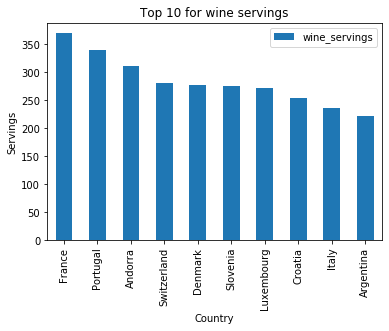

In [ ]:
data5 = data5[:10]

data5.plot.bar(x = 'country', y = 'wine_servings')
plt.title("Top 10 for wine servings")
plt.xlabel("Country")
plt.ylabel("Servings")

In [ ]:
path5= "C:/Users/igach/Desktop/Studia 7 semestr/7 semestr/Bazy-danych/Lab2/Analysis Data" + "/Top_10_wine_servings.csv"
data5.to_csv(path5)